In [ ]:
! pip install shap

In [2]:
import xgboost
import shap

In [3]:
# train XGBoost model
X, y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X, y)

In [4]:
# compute SHAP values
explainer = shap.Explainer(model, X)
explanation = explainer(X[:1000])

# Simple dependence scatter plot

相關性散佈圖顯示單一特徵對模型預測的影響。
在此範例中，20 歲至 40 歲之間收入超過 5 萬美元的機率顯著增加。

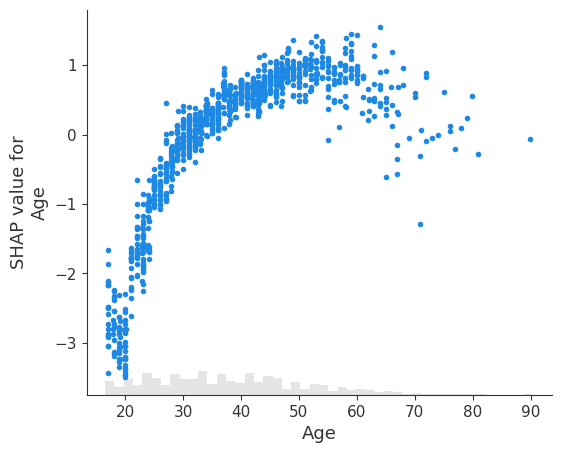

In [5]:
shap.plots.scatter(explanation[:, "Age"])

# Using color to highlight interaction effects

我們可以用另一個特徵對年齡依賴性散點圖進行著色。如果我們將整個 Explanation 物件傳遞給顏色參數，則散佈圖會嘗試挑選與年齡互動最強的特徵列。

以下會看到使用顏色突出互動效果
上圖中的垂直分散表明，年齡特徵的相同值可能會對不同人的模型輸出產生不同的影響。這意味著年齡和其他特徵之間的模型中存在非線性交互效應（否則散點圖將完全遵循 shap.plots.partial_dependence 給出的線）。

為了顯示哪個特徵可能驅動這些交互作用，我們可以用另一個特徵對年齡依賴性散點圖進行著色。如果我們將整個 Explanation 物件傳遞給顏色參數，則散佈圖會嘗試挑選與年齡互動最強的特徵列。如果這個其他特徵和我們正在繪製的特徵之間存在交互效應，它將顯示為獨特的垂直著色圖案。對於以下的範例，受教育程度較高的 20 歲人士的收入超過 5 萬美元的可能性低於受教育程度較低的 20 歲人士。這表明教育數量和年齡之間存在交互作用。


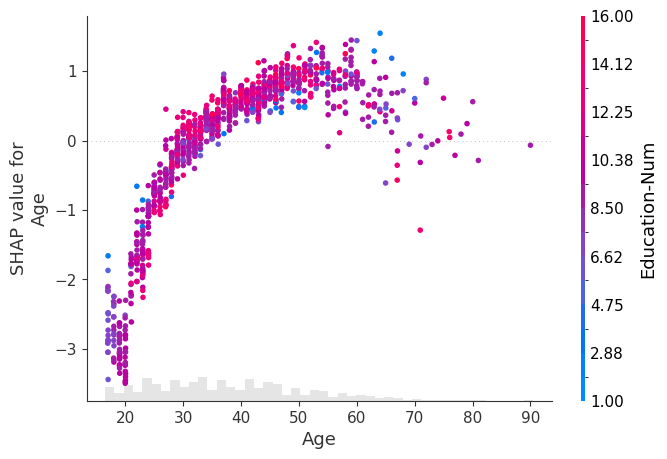

In [6]:
shap.plots.scatter(explanation[:, "Age"], color=explanation)

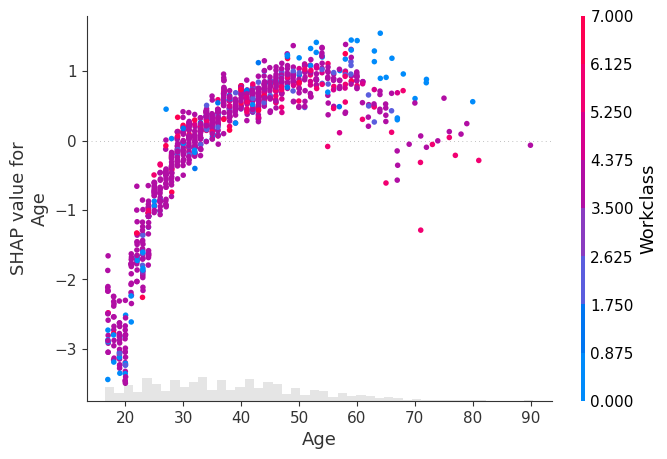

In [7]:
shap.plots.scatter(explanation[:, "Age"], color=explanation[:, "Workclass"])

我們可以將 Explanation 物件的 .display_data 屬性設定為我們希望在圖中顯示的資料的平行版本。

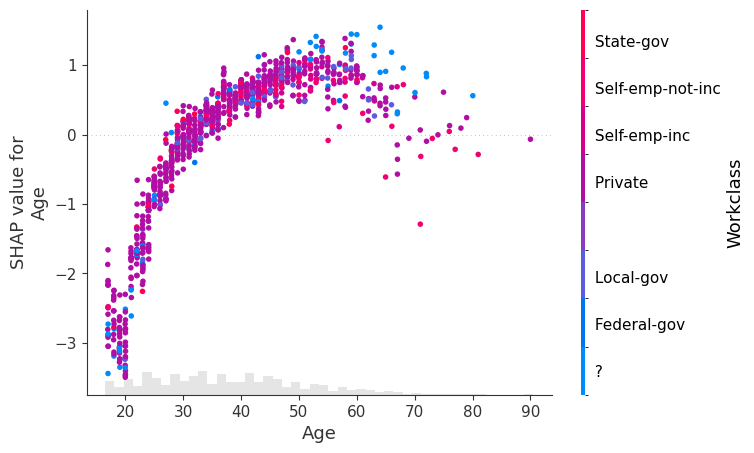

In [8]:
X_display, y = shap.datasets.adult(display=True)
explanation.display_data = X_display.values

shap.plots.scatter(explanation[:, "Age"], color=explanation[:, "Workclass"])

# Using global feature importance orderings

我們可以使用 Explanation 物件的點連結功能來計算全域特徵重要性的度量，按該度量排序（降序），然後挑選出最重要的特徵

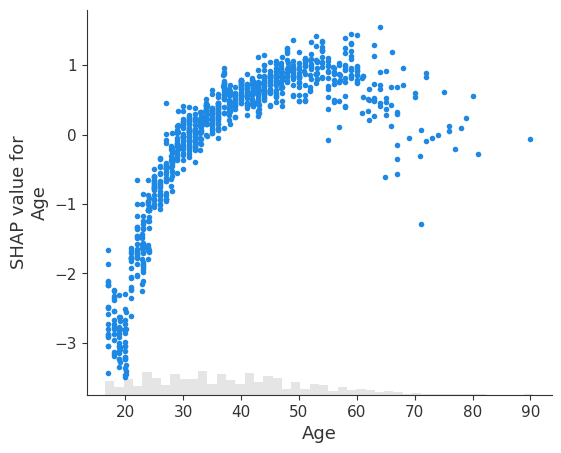

In [9]:
shap.plots.scatter(explanation[:, explanation.abs.mean(0).argsort[-1]])

第二個最重要的功能是Relationship

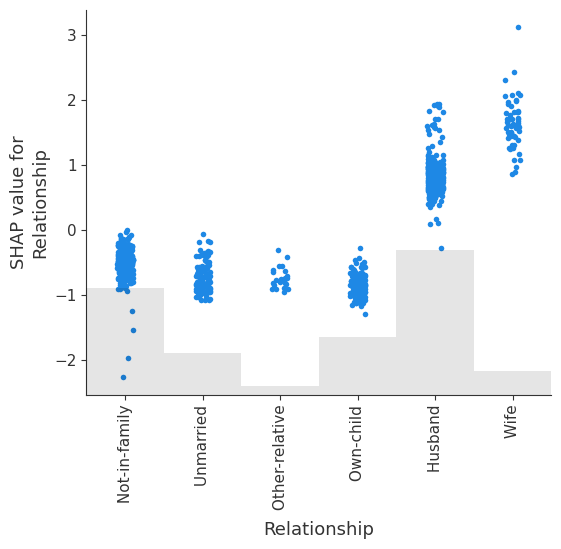

In [10]:
shap.plots.scatter(explanation[:, explanation.abs.mean(0).argsort[-2]])

年齡是整個資料集平均絕對值最大的特徵，但資本收益是對任何樣本具有最大絕對影響的特徵。

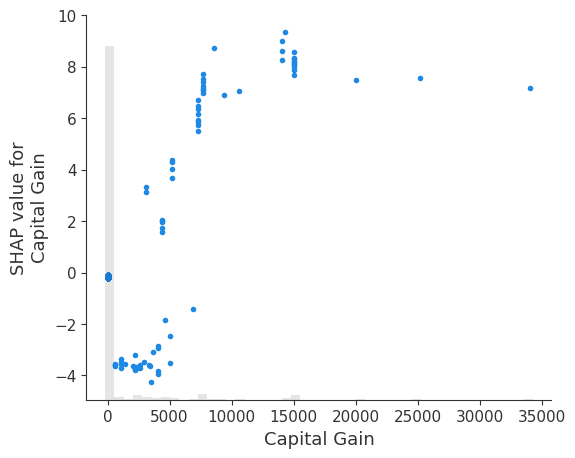

In [11]:
shap.plots.scatter(explanation[:, explanation.abs.max(0).argsort[-1]])

# Exploring different interaction colorings

取出與 "Age" 最相關的前三個可能交互特徵，分別繪製三個散點圖，通過可視化 SHAP 值隨這些交互特徵的變化，可以更好地理解模型中的複雜關係，從而提升解釋力。

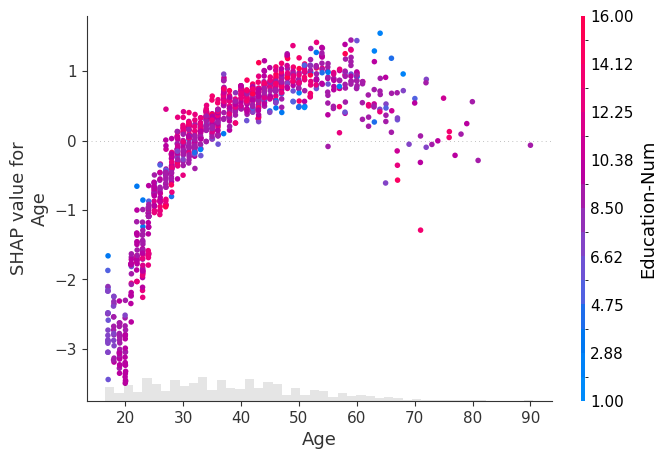

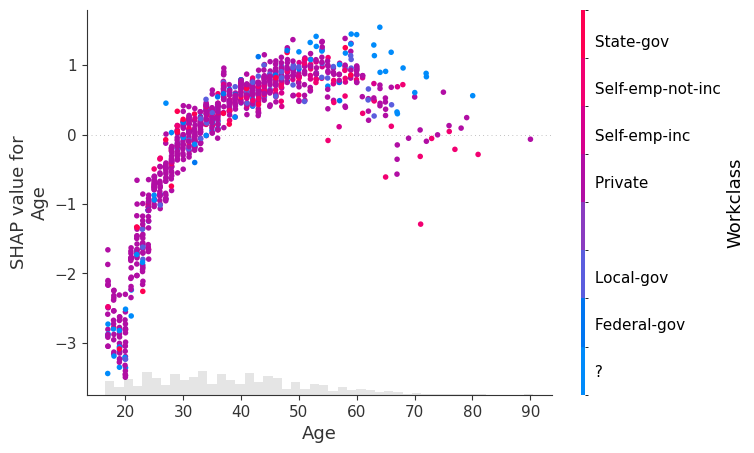

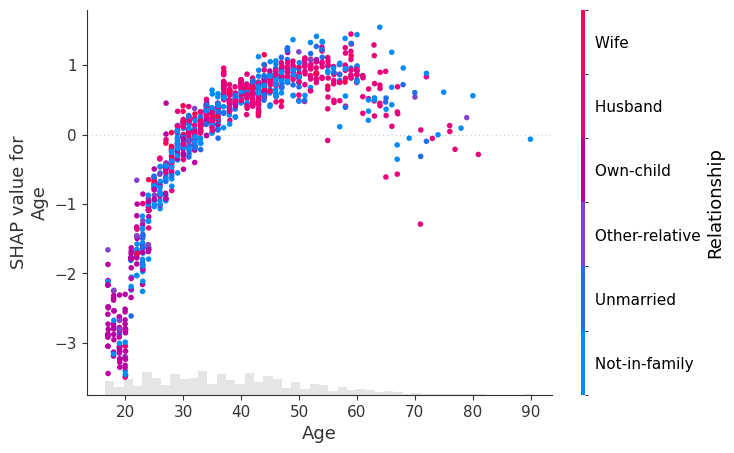

In [12]:
inds = shap.utils.potential_interactions(explanation[:, "Age"], explanation)

for i in range(3):
    shap.plots.scatter(explanation[:, "Age"], color=explanation[:, inds[i]])

# Customizing the figure properties
# Change title and tick label

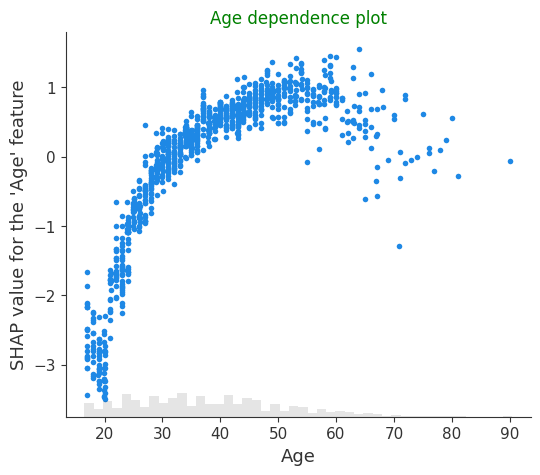

In [24]:
import matplotlib.pyplot as plt

scatter = shap.plots.scatter(explanation[:, "Age"], show=False)
plt.title("Age dependence plot", color="g")
plt.ylabel("SHAP value for the 'Age' feature")
plt.show()

# Control outliers

使用帶有百分位符號的 xmax 和 xmin 來隱藏異常值。

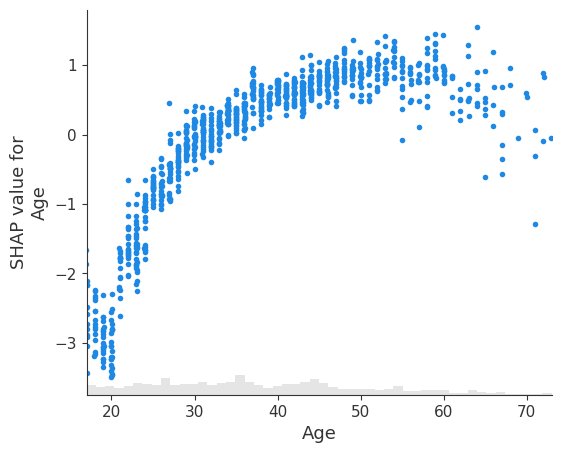

In [14]:
age = explanation[:, "Age"]
shap.plots.scatter(age, xmin=age.percentile(1), xmax=age.percentile(99))

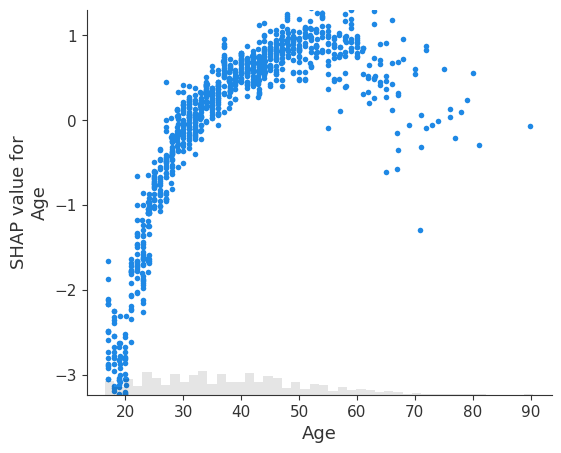

In [15]:
age = explanation[:, "Age"]
shap.plots.scatter(age, ymin=age.percentile(1), ymax=age.percentile(99))

# Opacity of the points

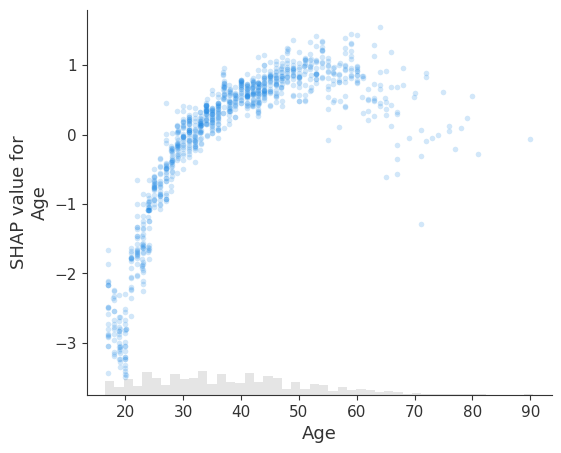

In [16]:
shap.plots.scatter(explanation[:, "Age"], alpha=0.2)

# Change point size

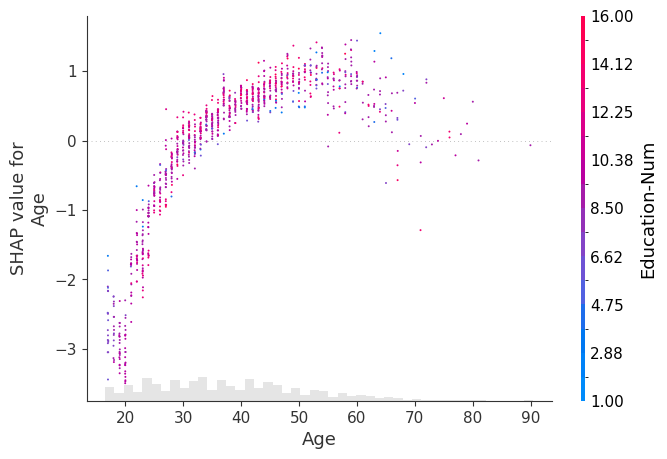

In [17]:
shap.plots.scatter(explanation[:, "Age"], dot_size=2, color=explanation)

# Add x-jitter to points

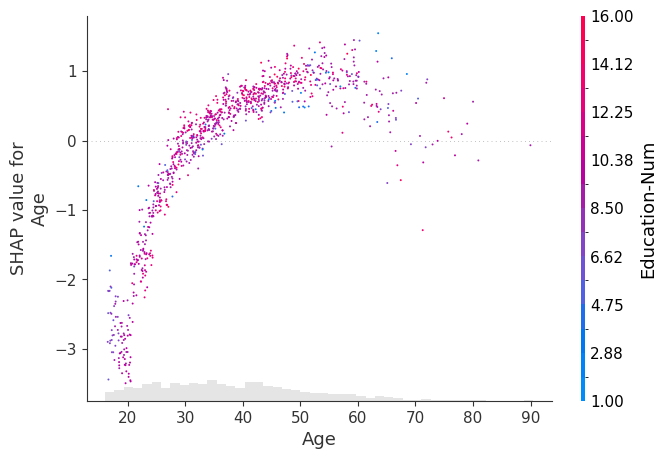

In [18]:
shap.plots.scatter(explanation[:, "Age"], dot_size=2, x_jitter=1, color=explanation)

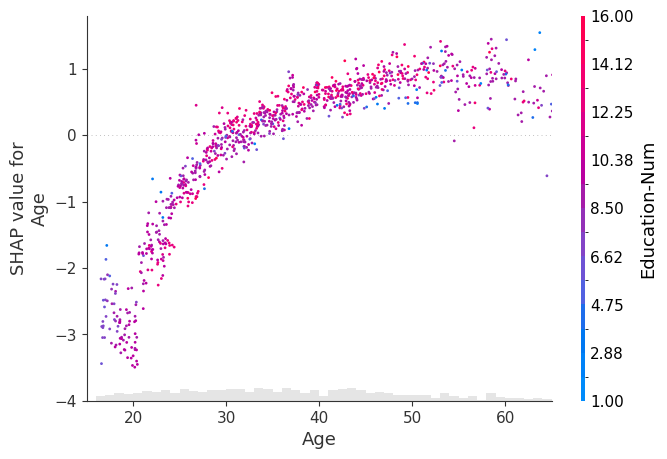

In [19]:
shap.plots.scatter(
    explanation[:, "Age"],
    dot_size=4,
    x_jitter=1,
    color=explanation,
    xmin=15,
    xmax=65,
    ymin=-4,
    ymax=1.8,
)

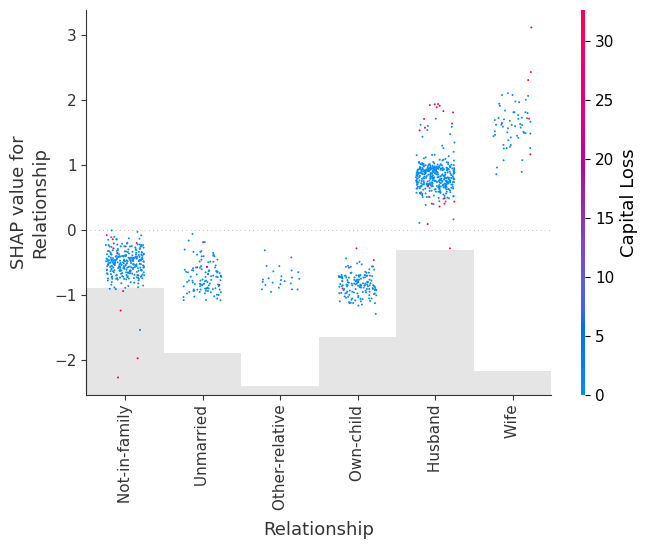

In [20]:
shap.plots.scatter(explanation[:, "Relationship"], dot_size=2, x_jitter=0.5, color=explanation)

# Custom colormap

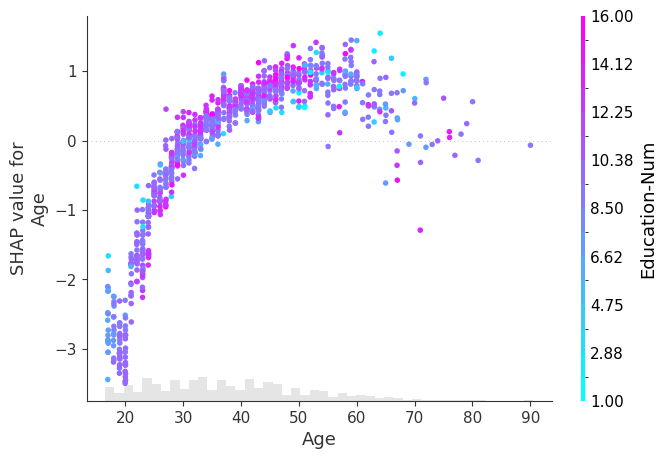

In [21]:
shap.plots.scatter(explanation[:, "Age"], color=explanation, cmap=plt.get_cmap("cool"))

# Other customizations

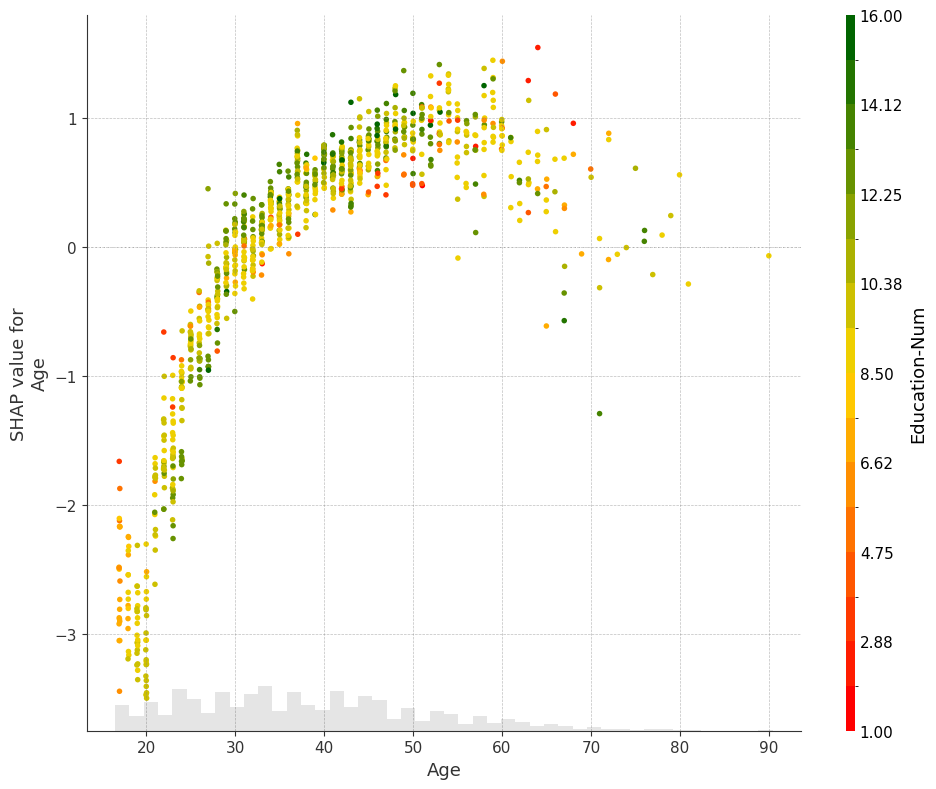

In [26]:
from matplotlib.colors import LinearSegmentedColormap

fig, ax = plt.subplots(tight_layout=True, figsize=(10, 8))
start_color = (1, 0, 0)  # red
middle_color = (1, 0.843, 0)  # gold
end_color = (0, 0.392, 0) # green

cmap = LinearSegmentedColormap.from_list("custom_cmap", [start_color, middle_color, end_color], N=1000)

ax.grid(linestyle="--", color="gray", linewidth=0.5, zorder=0, alpha=0.5)

shap.plots.scatter(explanation[:, "Age"], color=explanation, cmap=cmap, ax=ax)

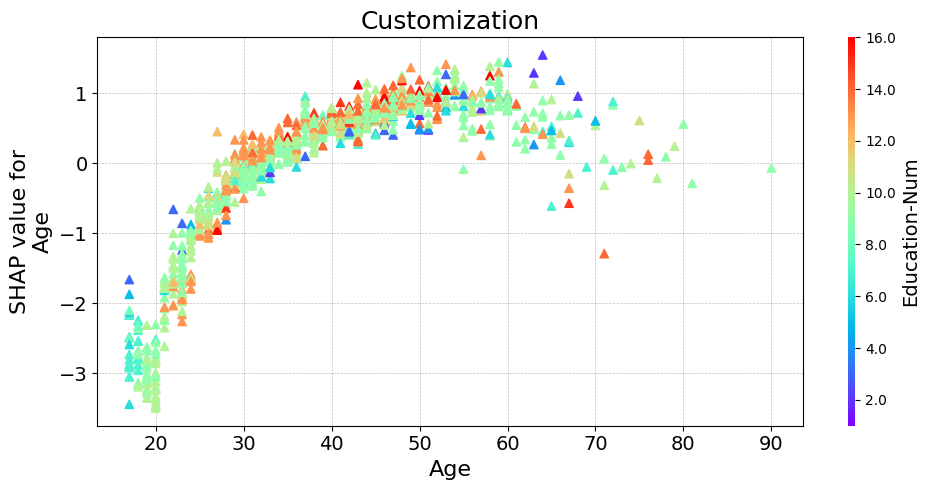

In [27]:
fig, ax = plt.subplots(tight_layout=True, figsize=(10, 5))

# or you need more flexible customization
scatter = ax.scatter(
    explanation[:, "Age"].data,
    explanation[:, "Age"].values,
    c=explanation[:, "Education-Num"].data,
    marker="^",
    cmap=plt.get_cmap("rainbow"),
    rasterized=True,
    zorder=5,
)

cbar = plt.colorbar(scatter, aspect=50, format="%2.1f")
cbar.set_label("Education-Num", fontsize=14)
cbar.outline.set_visible(False)

ax.set_title("Customization", fontsize=18)
ax.set_xlabel("Age", fontsize=16)
ax.set_ylabel("SHAP value for\nAge", fontsize=16)

ax.tick_params(labelsize=14)

ax.grid(linestyle="--", color="gray", linewidth=0.5, zorder=0, alpha=0.5)

plt.show()

https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/scatter.html